# Traitement du dataset

### Objectif :
    
- Explorer et analyser les données
- Réaliser une segmentation RFM (La récence, la fréquence et le montant)
- Nous gardons aussi les informations relatifs aux commandes comme le nombre de produits par commandes, les prix des produits et des frais de port ainsi que des informations relatifs aux paiements, tels que les facilités de paiements et pour finir les informations relatifs à la localisation

## Imports

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import datetime

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

import warnings

#### Message d'avertissement

In [2]:
warnings.filterwarnings("ignore")

#### Dimension DataFramme

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

#### Fonctions

In [4]:
def visu(dataf) : # Fonction visualisation du taux de remplissage
    df = pd.DataFrame(index=['Valeurs manquantes','Nombre de valeurs' ,'Taux de remplissage','Valeurs différentes'], columns= dataf.columns )
    
    for v in dataf.columns:
        #Somme des valeurs manquantes
        df.loc['Valeurs manquantes', v] = dataf[v].isnull().sum()
        # Nombre de valeurs 
        df.loc['Nombre de valeurs', v] = dataf.shape[0] - dataf[v].isnull().sum()
        #Taux de remplissage en %
        df.loc['Taux de remplissage', v] =((dataf.shape[0]- dataf[v].isnull().sum())/(dataf.shape[0]*1.0))*100 
        # Nombre de valeurs différentes
        df.loc['Valeurs différentes', v] = dataf[v].nunique()
        
    df1 = df.T #Tranposition du Dataframe
    # Conversion du type des colonnes
    df1['Valeurs manquantes'] = df1['Valeurs manquantes'].astype(int) 
    df1['Nombre de valeurs'] = df1['Nombre de valeurs'].astype(int)
    df1['Taux de remplissage'] = df1['Taux de remplissage'].astype(float)
    df1['Valeurs différentes'] = df1['Valeurs différentes'].astype(int)
    df1 = df1.sort_values(by=['Taux de remplissage'], ascending = False)
    
    plt.figure(figsize= (5,5))
    sns.set_theme()
    sns.barplot(x=df1["Taux de remplissage"], y=df1.index, palette="Blues_r")
    plt.xlabel("Taux de remplissage en (%)", fontsize=13)
    plt.ylabel("Colonnes", fontsize=13)
    plt.title("Taux de replissage des colonnes", fontsize=16)
    plt.axvline(x=20, color='w')
    plt.axvline(x=80, color='w')
    
    plt.show()
    
    return df
    

### Pré-exploration fichier

#### Customers

In [5]:
customers = pd.read_csv('./Data/olist_customers_dataset.csv')

In [6]:
customers.shape

(99441, 5)

In [7]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


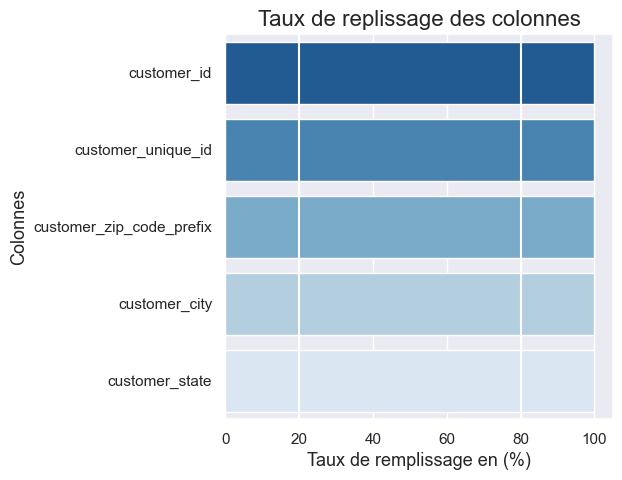

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
Valeurs manquantes,0,0,0,0,0
Nombre de valeurs,99441,99441,99441,99441,99441
Taux de remplissage,100.0,100.0,100.0,100.0,100.0
Valeurs différentes,99441,96096,14994,4119,27


In [8]:
visu(customers)

#### Geolocation

In [9]:
geo = pd.read_csv('./Data/olist_geolocation_dataset.csv')

In [10]:
geo.shape

(1000163, 5)

In [11]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


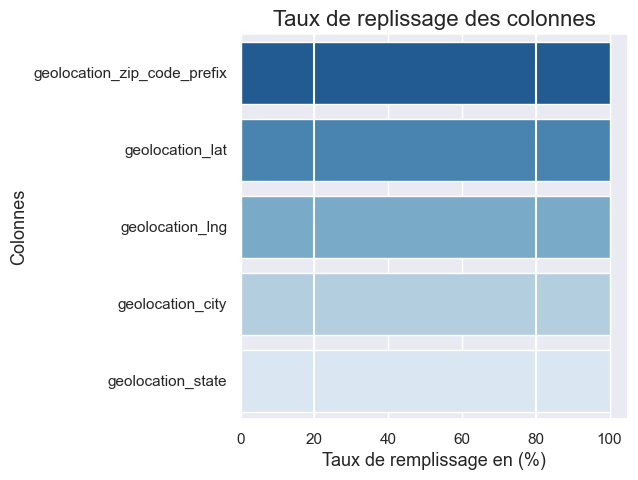

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
Valeurs manquantes,0,0,0,0,0
Nombre de valeurs,1000163,1000163,1000163,1000163,1000163
Taux de remplissage,100.0,100.0,100.0,100.0,100.0
Valeurs différentes,19015,717360,717613,8011,27


In [12]:
visu(geo)

#### Items

In [13]:
items = pd.read_csv('./Data/olist_order_items_dataset.csv')

In [14]:
items.shape

(112650, 7)

In [15]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


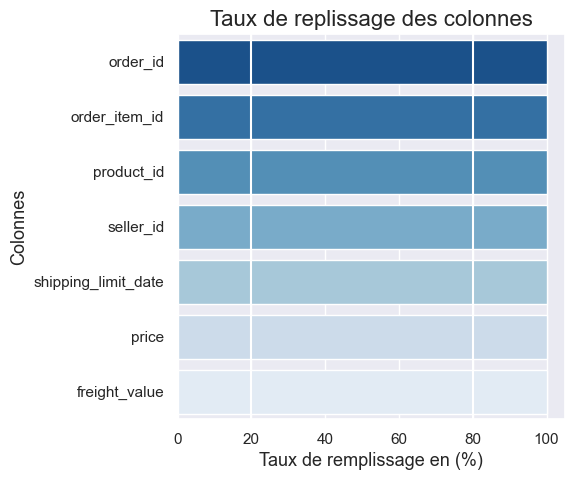

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
Valeurs manquantes,0,0,0,0,0,0,0
Nombre de valeurs,112650,112650,112650,112650,112650,112650,112650
Taux de remplissage,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Valeurs différentes,98666,21,32951,3095,93318,5968,6999


In [16]:
visu(items)

#### Payment

In [17]:
pay = pd.read_csv('./Data/olist_order_payments_dataset.csv')

In [18]:
pay.shape

(103886, 5)

In [19]:
pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


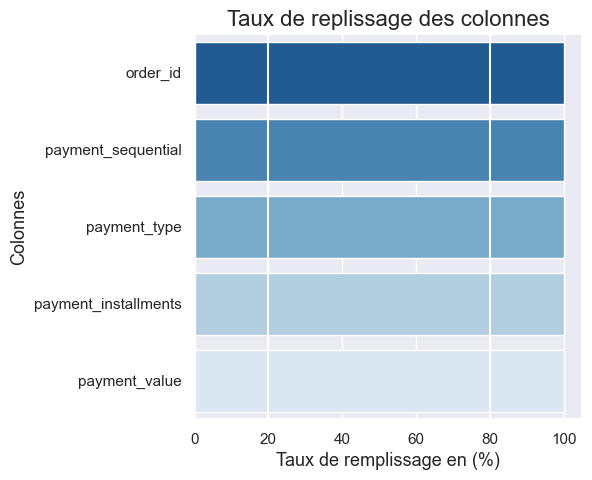

,order_id,payment_sequential,payment_type,payment_installments,payment_value
Valeurs manquantes,0,0,0,0,0
Nombre de valeurs,103886,103886,103886,103886,103886
Taux de remplissage,100.0,100.0,100.0,100.0,100.0
Valeurs différentes,99440,29,5,24,29077


In [20]:
visu(pay)

#### Reviews

In [21]:
reviews = pd.read_csv('./Data/olist_order_reviews_dataset.csv')

In [22]:
reviews.shape

(99224, 7)

In [23]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


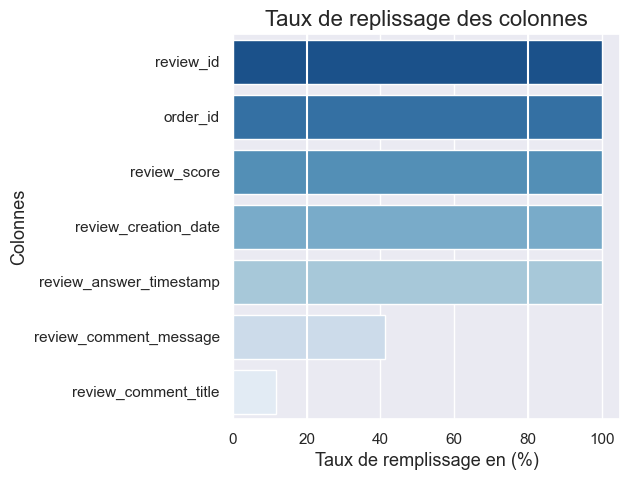

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
Valeurs manquantes,0,0,0,87656,58247,0,0
Nombre de valeurs,99224,99224,99224,11568,40977,99224,99224
Taux de remplissage,100.0,100.0,100.0,11.65847,41.297468,100.0,100.0
Valeurs différentes,98410,98673,5,4527,36159,636,98248


In [24]:
visu(reviews)

#### Orders

In [25]:
orders = pd.read_csv('./Data/olist_orders_dataset.csv')

In [26]:
orders.shape

(99441, 8)

In [27]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


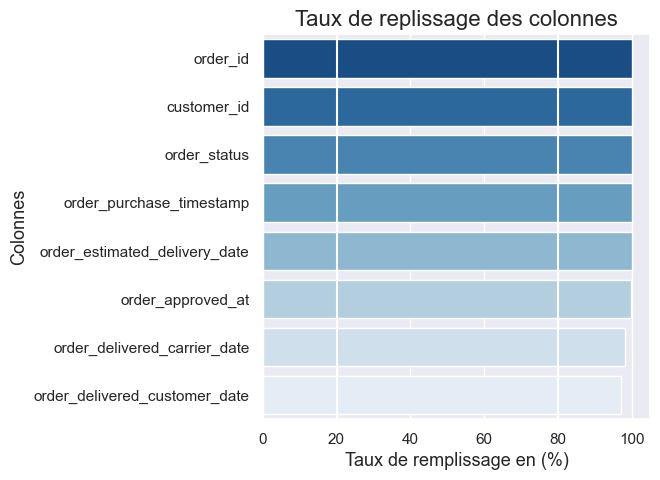

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
Valeurs manquantes,0,0,0,0,160,1783,2965,0
Nombre de valeurs,99441,99441,99441,99441,99281,97658,96476,99441
Taux de remplissage,100.0,100.0,100.0,100.0,99.839101,98.206977,97.018332,100.0
Valeurs différentes,99441,99441,8,98875,90733,81018,95664,459


In [28]:
visu(orders)

#### Products

In [29]:
products = pd.read_csv('./Data/olist_products_dataset.csv')

In [30]:
products.shape

(32951, 9)

In [31]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


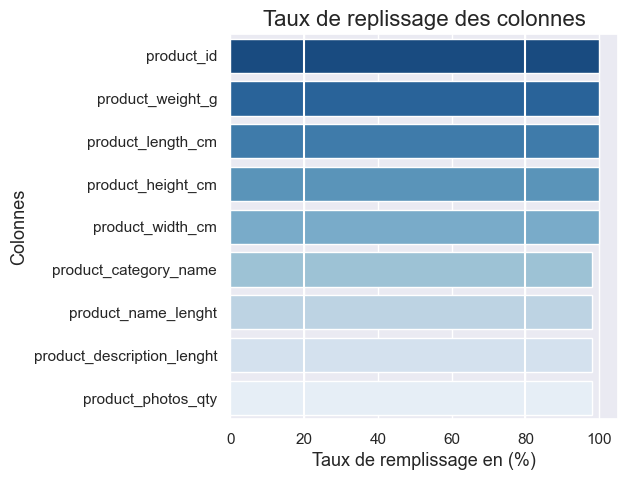

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
Valeurs manquantes,0,610,610,610,610,2,2,2,2
Nombre de valeurs,32951,32341,32341,32341,32341,32949,32949,32949,32949
Taux de remplissage,100.0,98.148766,98.148766,98.148766,98.148766,99.99393,99.99393,99.99393,99.99393
Valeurs différentes,32951,73,66,2960,19,2204,99,102,95


In [32]:
visu(products)

#### Sellers

In [33]:
sellers = pd.read_csv('./Data/olist_sellers_dataset.csv')

In [34]:
sellers.shape

(3095, 4)

In [35]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


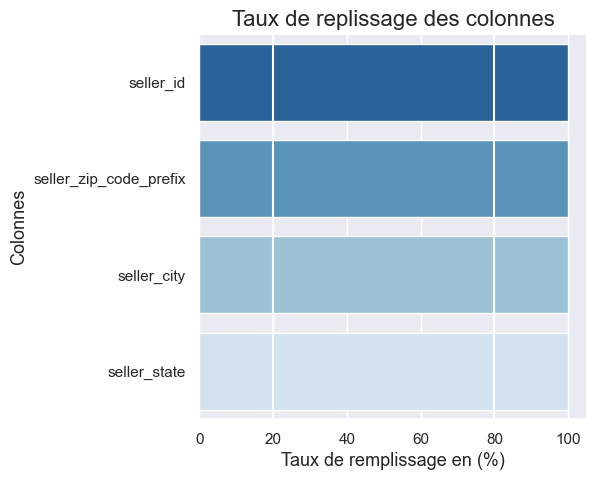

,seller_id,seller_zip_code_prefix,seller_city,seller_state
Valeurs manquantes,0,0,0,0
Nombre de valeurs,3095,3095,3095,3095
Taux de remplissage,100.0,100.0,100.0,100.0
Valeurs différentes,3095,2246,611,23


In [36]:
visu(sellers)

#### Category

In [37]:
cat = pd.read_csv('./Data/product_category_name_translation.csv')

In [38]:
cat.shape

(71, 2)

In [39]:
cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


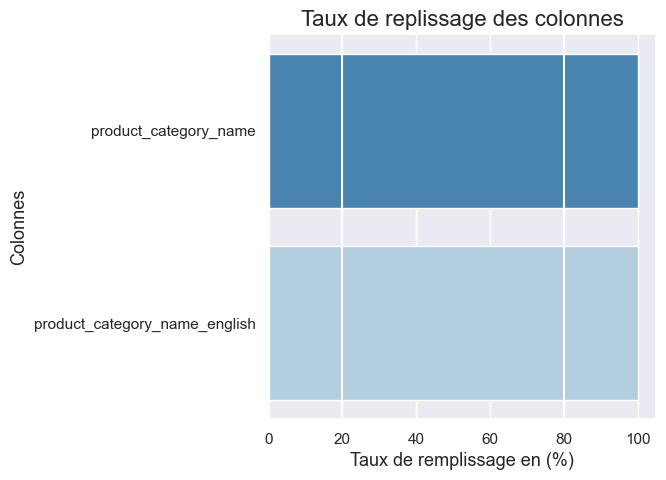

,product_category_name,product_category_name_english
Valeurs manquantes,0,0
Nombre de valeurs,71,71
Taux de remplissage,100.0,100.0
Valeurs différentes,71,71


In [40]:
visu(cat)

### Assemblage et traitements du dataset

#### Jointure Customers et Orders

In [41]:
df = pd.merge(customers, orders, on="customer_id")

In [42]:
df.shape

(99441, 12)

#### Tri des status de commandes
- Enlever les commandes avec les status unavailable et canceled

In [43]:
df['order_status'].unique()

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'unavailable', 'approved', 'created'], dtype=object)

In [44]:
una = df.loc[(df['order_status'] == 'unavailable') | (df['order_status'] == 'canceled')]

In [45]:
una.shape

(1234, 12)

In [46]:
df.drop(index= una.index, axis=0, inplace = True)

df.reset_index(drop=True, inplace = True)

In [47]:
df.shape

(98207, 12)

#### Jointure avec Payments

In [48]:
df = df.merge(pay, on='order_id')

In [49]:
df.shape

(102573, 16)

#### Traitement des paiements

 - Faire la somme des paiements et leur facilité de paiements par commande

In [50]:
df_pay= df.loc[df['order_id'].duplicated(keep=False)]

In [51]:
#Liste des commandes en double
ids = df_pay['order_id'].unique().tolist()

# dataframe de stockage
df_remp = pd.DataFrame(columns = df.columns.tolist())

for n in range(len(ids)):
    df_temp = df_pay.loc[df_pay['order_id'] == ids[n]]
    
    # Remplissage dataframe
    col = df.drop(['payment_installments','payment_value'], axis = 1).columns.tolist()
    df_remp.loc[n, col] = df_temp.iloc[0,:-2]
    df_remp.loc[n,'payment_installments'] = df_temp['payment_installments'].sum()
    df_remp.loc[n,'payment_value'] = df_temp['payment_value'].sum()
    
    

#### Conbinaison

In [52]:
df.shape

(102573, 16)

In [53]:
df_pay.shape

(7287, 16)

In [54]:
df_remp.shape

(2920, 16)

In [55]:
df.drop(index= df_pay.index, axis=0, inplace = True)
df = pd.concat([df, df_remp],ignore_index=True)

In [56]:
df.reset_index(drop=True, inplace = True)

In [57]:
df.shape

(98206, 16)

#### jointure avec rewiews

In [58]:
df = pd.merge(df, reviews[['order_id','review_score']], how='left', on='order_id')

In [59]:
df.shape

(98751, 17)

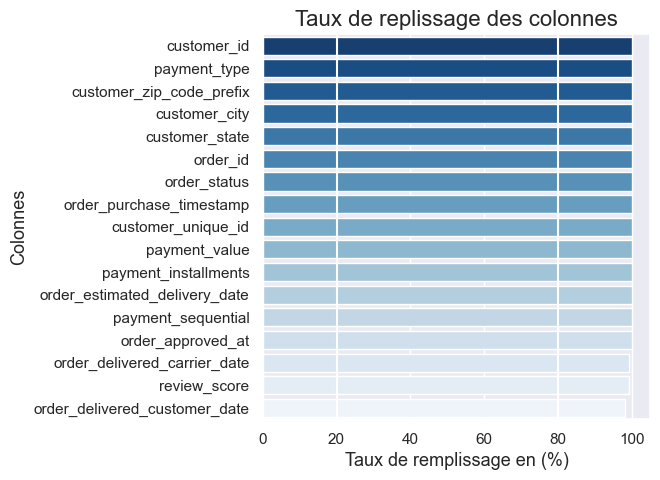

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_score
Valeurs manquantes,0,0,0,0,0,0,0,0,19,629,1753,0,0,0,0,0,734
Nombre de valeurs,98751,98751,98751,98751,98751,98751,98751,98751,98732,98122,96998,98751,98751,98751,98751,98751,98017
Taux de remplissage,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.98076,99.363044,98.224828,100.0,100.0,100.0,100.0,100.0,99.256716
Valeurs différentes,98206,94989,14964,4109,27,98206,6,97654,89759,80950,95657,446,16,4,28,27799,5


In [60]:
visu(df)

#### Traitement des doublons

In [61]:
df.loc[df['order_id'].duplicated(keep='last')].shape

(545, 17)

In [62]:
df_drop = df.loc[df['order_id'].duplicated(keep='last')]

In [63]:
df_drop.shape

(545, 17)

In [64]:
df.drop(index= df_drop.index, axis=0, inplace = True)

df.reset_index(drop=True, inplace = True)

df.shape

(98206, 17)

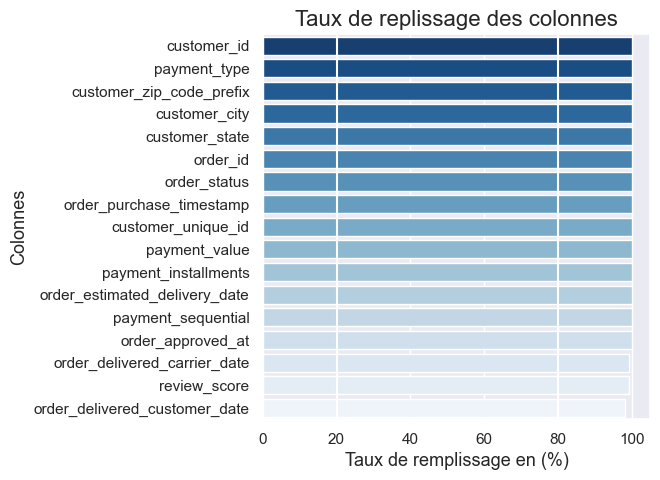

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_score
Valeurs manquantes,0,0,0,0,0,0,0,0,19,624,1737,0,0,0,0,0,734
Nombre de valeurs,98206,98206,98206,98206,98206,98206,98206,98206,98187,97582,96469,98206,98206,98206,98206,98206,97472
Taux de remplissage,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.980653,99.364601,98.231269,100.0,100.0,100.0,100.0,100.0,99.252591
Valeurs différentes,98206,94989,14964,4109,27,98206,6,97654,89759,80950,95657,446,16,4,28,27799,5


In [65]:
visu(df)

#### Imputation de reviews score par 3

- Imputation de note par 3 la note moyenne, en partant que les clients sont ni satisfait, ni déçu du produit

In [66]:
df['review_score'].fillna(3, inplace = True)

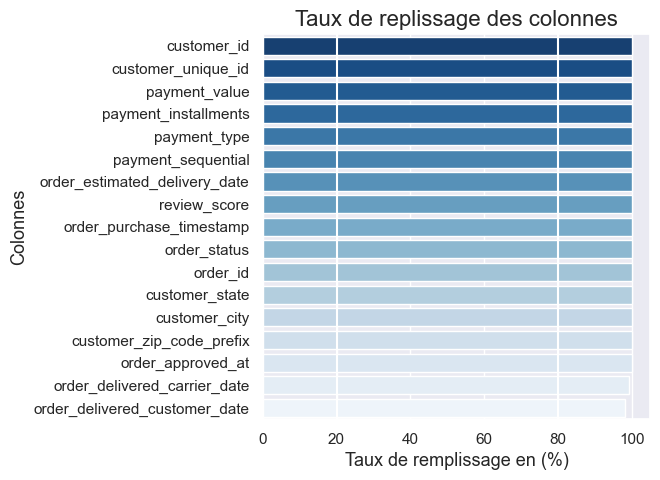

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_score
Valeurs manquantes,0,0,0,0,0,0,0,0,19,624,1737,0,0,0,0,0,0
Nombre de valeurs,98206,98206,98206,98206,98206,98206,98206,98206,98187,97582,96469,98206,98206,98206,98206,98206,98206
Taux de remplissage,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.980653,99.364601,98.231269,100.0,100.0,100.0,100.0,100.0,100.0
Valeurs différentes,98206,94989,14964,4109,27,98206,6,97654,89759,80950,95657,446,16,4,28,27799,5


In [67]:
visu(df)

#### Jointure avec items

In [68]:
df = df.merge(items[['order_id','order_item_id', 'price','freight_value', 'product_id']], how='left', on='order_id')

In [69]:
df.shape

(112106, 21)

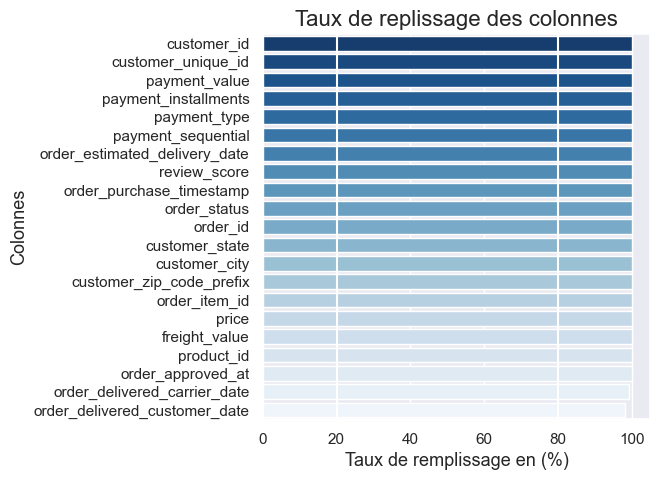

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,price,freight_value,product_id
Valeurs manquantes,0,0,0,0,0,0,0,0,20,728,1920,0,0,0,0,0,0,8,8,8,8
Nombre de valeurs,112106,112106,112106,112106,112106,112106,112106,112106,112086,111378,110186,112106,112106,112106,112106,112106,112106,112098,112098,112098,112098
Taux de remplissage,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.98216,99.350615,98.287335,100.0,100.0,100.0,100.0,100.0,100.0,99.992864,99.992864,99.992864,99.992864
Valeurs différentes,98206,94989,14964,4109,27,98206,6,97654,89759,80950,95657,446,16,4,28,27799,5,21,5934,6985,32729


In [70]:
visu(df)

#### Jointure avec product et categories

In [71]:
df =df.merge(products[['product_id','product_category_name']], how='left', on='product_id')

In [72]:
df =df.merge(cat, how='left', on='product_category_name')

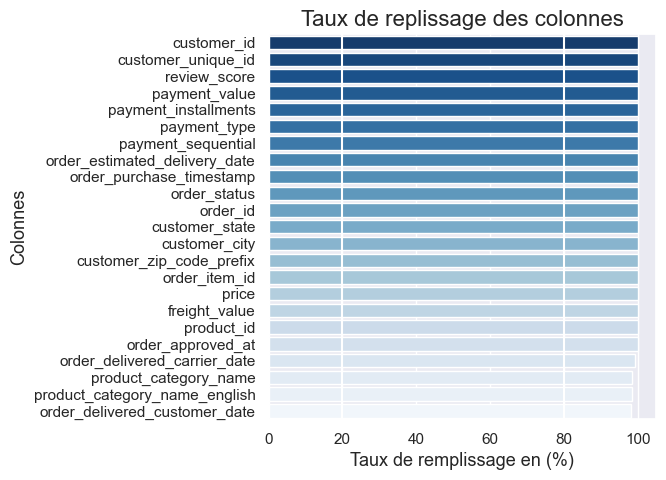

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,price,freight_value,product_id,product_category_name,product_category_name_english
Valeurs manquantes,0,0,0,0,0,0,0,0,20,728,1920,0,0,0,0,0,0,8,8,8,8,1597,1619
Nombre de valeurs,112106,112106,112106,112106,112106,112106,112106,112106,112086,111378,110186,112106,112106,112106,112106,112106,112106,112098,112098,112098,112098,110509,110487
Taux de remplissage,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.98216,99.350615,98.287335,100.0,100.0,100.0,100.0,100.0,100.0,99.992864,99.992864,99.992864,99.992864,98.575455,98.555831
Valeurs différentes,98206,94989,14964,4109,27,98206,6,97654,89759,80950,95657,446,16,4,28,27799,5,21,5934,6985,32729,73,71


In [73]:
visu(df)

#### Traitement des catégories

In [74]:
# Les valeurs présentes dans le dataFrame 
cat_df = df['product_category_name'].unique()

In [75]:
# Les valeurs présentes dans catégories
cat_cat = cat['product_category_name'].unique()

In [76]:
intrus = []
for n in cat_df:
    if n in cat_cat:
        pass
    else:
        intrus.append(n)

In [77]:
intrus

[nan, 'portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer']

In [78]:
# Imputation des variables connues
for r, l in df.iterrows():
    if l['product_category_name'] == intrus[1]:
        df.loc[r,'product_category_name_english'] = 'portable kitchen_and_food_preparators'
    elif l['product_category_name'] == intrus[2]:
        df.loc[r,'product_category_name_english'] = 'pc_gamer'

In [79]:
# Imputation des valeurs inconnues par 'unknown'
df['product_category_name_english'].fillna('unknown', inplace=True)

#### Suppression des colonnes inutiles

In [80]:
df.drop(['product_id','order_approved_at','order_delivered_carrier_date',\
         'order_delivered_customer_date','order_estimated_delivery_date','product_category_name'], axis=1, inplace= True)

In [81]:
df.shape

(112106, 17)

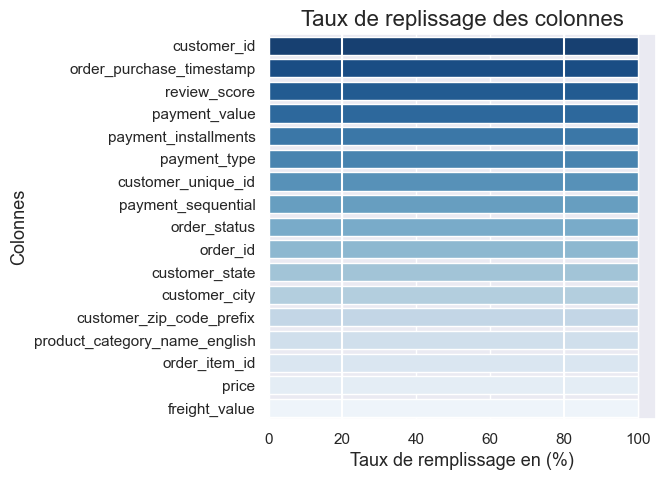

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,price,freight_value,product_category_name_english
Valeurs manquantes,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,8,0
Nombre de valeurs,112106,112106,112106,112106,112106,112106,112106,112106,112106,112106,112106,112106,112106,112098,112098,112098,112106
Taux de remplissage,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.992864,99.992864,99.992864,100.0
Valeurs différentes,98206,94989,14964,4109,27,98206,6,97654,16,4,28,27799,5,21,5934,6985,74


In [82]:
visu(df)

#### Imputation des 
- Imputation de order_item_id, price, freight_value par le mode pour chaque payment_value

In [83]:
#Isolation des nan
df_nan = df.loc[(df['order_item_id'].isnull()) |(df['price'].isnull())|(df['freight_value'].isnull())]

In [84]:
df_nan

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,price,freight_value,product_category_name_english
14322,4ee64f4bfc542546f422da0aeb462853,10d5890ed5e7ec78a7db23b5ac579b17,93025,sao leopoldo,RS,35de4050331c6c644cddc86f4f2d0d64,created,2017-12-05 01:07:58,1,credit_card,7,105.87,3.0,NaN,NaN,NaN,unknown
49645,7d61b9f4f216052ba664f22e9c504ef1,161e5b2b4513edb336986a8909218365,87720,paranavai,PR,90ab3e7d52544ec7bc3363c82689965f,created,2017-11-06 13:12:34,1,credit_card,6,245.85,5.0,NaN,NaN,NaN,unknown
55952,964a6df3d9bdf60fe3e7b8bb69ed893a,2e015e68fbfa36910263df5384e8e45c,73401,brasilia,DF,dba5062fbda3af4fb6c33b1e040ca38f,created,2018-02-09 17:21:04,1,boleto,1,137.6,3.0,NaN,NaN,NaN,unknown
59593,d7bed5fac093a4136216072abaf599d5,f15a952dfc52308d0361288fbf42c7b3,91250,porto alegre,RS,a68ce1686d536ca72bd2dadc4b8671e5,shipped,2016-10-05 01:47:40,1,boleto,1,77.73,1.0,NaN,NaN,NaN,unknown
74350,b2d7ae0415dbbca535b5f7b38056dd1f,6a2da481aa7827b951175772a0fe8bb8,16012,aracatuba,SP,2ce9683175cdab7d1c95bcbb3e36f478,invoiced,2016-10-05 21:03:33,1,boleto,1,73.04,1.0,NaN,NaN,NaN,unknown
84380,0d00d77134cae4c58695086ad8d85100,8886115442775dd8a20c2dcc921c7cc8,88070,florianopolis,SC,e04f1da1f48bf2bbffcf57b9824f76e1,invoiced,2016-10-05 13:22:20,1,credit_card,7,76.19,1.0,NaN,NaN,NaN,unknown
86735,438449d4af8980d107bf04571413a8e7,55fbb57fd54c35a38c80c2a032a6ca6e,15300,general salgado,SP,b5359909123fa03c50bdb0cfed07f098,created,2017-12-05 01:07:52,1,credit_card,10,160.94,1.0,NaN,NaN,NaN,unknown
95482,725e9c75605414b21fd8c8d5a1c2f1d6,355862aa14375fe3950ee04fef9c7a53,22621,rio de janeiro,RJ,7a4df5d8cff4090e541401a20a22bb80,created,2017-11-25 11:10:33,1,boleto,1,37.84,1.0,NaN,NaN,NaN,unknown


In [85]:
for r, l in df_nan.iterrows():
    inter = df.loc[df['payment_value'] == l['payment_value']].mode().iloc[0]
    df.loc[r, 'order_item_id']  = inter['order_item_id']
    df.loc[r, 'price']  = inter['price']
    df.loc[r, 'freight_value']  = inter['freight_value']

In [86]:
df.loc[df['order_item_id'].isnull()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,price,freight_value,product_category_name_english
86735,438449d4af8980d107bf04571413a8e7,55fbb57fd54c35a38c80c2a032a6ca6e,15300,general salgado,SP,b5359909123fa03c50bdb0cfed07f098,created,2017-12-05 01:07:52,1,credit_card,10,160.94,1.0,NaN,NaN,NaN,unknown


In [87]:
# Cas Particulier, choix arbitraire d'imputation   
df.loc[86735, 'order_item_id']  = 1.0
df.loc[86735, 'freight_value']  = round((df.loc[86735,'payment_value']*0.10), 2)
df.loc[86735, 'price']  = round((df.loc[86735,'payment_value']*0.90), 2)

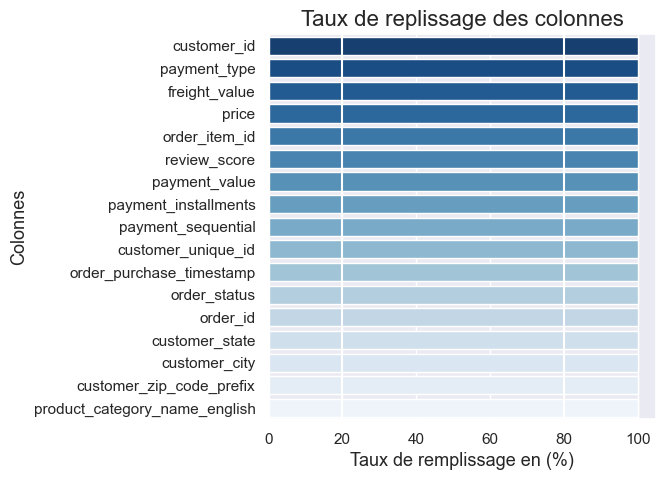

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,price,freight_value,product_category_name_english
Valeurs manquantes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nombre de valeurs,112106,112106,112106,112106,112106,112106,112106,112106,112106,112106,112106,112106,112106,112106,112106,112106,112106
Taux de remplissage,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Valeurs différentes,98206,94989,14964,4109,27,98206,6,97654,16,4,28,27799,5,21,5935,6985,74


In [88]:
visu(df)

#### Traitement des items par commandes

   - Faire la somme des items, des prix et des frais de port par commande, attribuer la catégorie de produit la plus dominante

In [89]:
df_order = df.loc[df['order_id'].duplicated(keep=False)]
df_order.shape

(23660, 17)

In [90]:
#Liste des commandes en double
logs = df_order['order_id'].unique().tolist()

# dataframe de stockage
df_rem = pd.DataFrame(columns = df.columns.tolist())

for n in range(len(logs)):
    df_temp = df_order.loc[df_order['order_id'] == logs[n]]
    i = df_temp['order_item_id'].nunique()
    
    if i != 1: # Cas des items multiple
        prix = df_temp['price'].sum() 
        freight = df_temp['freight_value'].sum()
        item = df_temp.shape[0]
        cate = df_temp['product_category_name_english'].mode().iloc[0]
        
    else : # Cas d'item unique
        prix = df_temp.iloc[0,-3]
        freight = df_temp.iloc[0,-2]
        item = 1
        cate =  df_temp.iloc[0,-1]

                           
    # Remplissage dataframe
    first = df.drop(['order_item_id','price','freight_value','product_category_name_english'], axis = 1).columns.tolist()
    
    df_rem.loc[n,first] = df_temp.iloc[0,:-4]
    df_rem.loc[n,'order_item_id'] = item
    df_rem.loc[n,'price'] = prix
    df_rem.loc[n,'freight_value'] = freight
    df_rem.loc[n,'product_category_name_english'] = cate
    
    
df_rem.shape

(9760, 17)

In [91]:
df.drop(index= df_order.index, axis=0, inplace = True)
df = pd.concat([df, df_rem],ignore_index=True)

df.reset_index(drop=True, inplace = True)

df.shape

(98206, 17)

In [92]:
#Suppression de colonnes inutiles
drop = ['customer_id', 'order_status', 'payment_sequential', 'payment_type']
df.drop(drop, axis=1, inplace = True)

In [93]:
#Renommer les colonnes
col = {'customer_unique_id':'id_client', 
       'customer_zip_code_prefix':'code_postal', 
       'customer_city':'ville', 
       'customer_state':'region', 
       'order_id':'id_commande', 
       'order_purchase_timestamp':'date_dernier_achat',
       'payment_installments':'nombre_paiement', 
       'payment_value':'montant_total', 
       'review_score':'note', 
       'order_item_id':'nombre_produit', 
       'price':'prix_produit', 
       'freight_value':'prix_frais_de_port', 
       'product_category_name_english':'categorie'}

df.rename(columns=col, inplace=True)

#### Conversion des colonnes
- Convertir les dates et garder la plus récente lors de la compression

In [94]:
df['date_dernier_achat'] = df['date_dernier_achat'].astype('datetime64[ns]')
df[['nombre_paiement', 'montant_total', 'prix_produit', 'prix_frais_de_port']] = \
df[['nombre_paiement', 'montant_total', 'prix_produit', 'prix_frais_de_port']].astype('float')
df[['code_postal','nombre_paiement','note', 'nombre_produit']]= \
df[['code_postal','nombre_paiement','note', 'nombre_produit']].astype('int')

In [95]:
df.dtypes

id_client                     object
code_postal                    int32
ville                         object
region                        object
id_commande                   object
date_dernier_achat    datetime64[ns]
nombre_paiement                int32
montant_total                float64
note                           int32
nombre_produit                 int32
prix_produit                 float64
prix_frais_de_port           float64
categorie                     object
dtype: object

#### Ajout d'une colonne groupe
Ajout d'un colonne groupe pour grouper les catégories en grands groupes

In [96]:
#Copie dataFrame
df_maj = df.copy()

#Liste des grands groupe
mode = ['fashion_childrens_clothes','fashion_bags_accessories','fashion_shoes','fashion_underwear_beach','fashion_male_clothing',\
        'fashio_female_clothing', 'fashion_sport', 'luggage_accessories', 'watches_gifts']
    
home = ['bed_bath_table',\
        'home_appliances', 'small_appliances', 'home_appliances_2', 'home_confort','furniture_bedroom',\
        'small_appliances_home_oven_and_coffee','home_comfort_2','portable kitchen_and_food_preparators', 'la_cuisine',\
        'furniture_mattress_and_upholstery','housewares']      
    
garden = ['garden_tools','kitchen_dining_laundry_garden_furniture', 'air_conditioning','costruction_tools_garden', 'flowers']
    
construction =  ['construction_tools_construction','home_construction ', 'furniture_living_room', 'construction_tools_lights',\
                 'construction_tools_safety','signaling_and_security','costruction_tools_tools','security_and_services',\
                 'home_construction']
    
art_and_music = ['musical_instruments', 'audio',  'art', 'cine_photo','dvds_blu_ray','music', 'arts_and_craftmanship',\
                 'cds_dvds_musicals']
    
beauty = ['health_beauty', 'perfumery', 'diapers_and_hygiene']
    
food = ['food', 'drinks', 'food_drink']
    
books_and_stationery = ['books_general_interest', 'books_technical', 'books_imported', 'stationery', 'office_furniture',\
                        'tablets_printing_image']
    
pc_and_electronics= ['computers_accessories', 'electronics', 'computers', 'pc_gamer','consoles_games']

telephony = ['telephony', 'fixed_telephony']

decor_and_other = [ 'furniture_decor','party_supplies','christmas_supplies','cool_stuff']

baby_and_children = ['baby', 'toys']

auto = ['auto']

commerce = ['industry_commerce_and_business', 'agro_industry_and_commerce', 'market_place']

other=['unknown', 'sports_leisure', 'pet_shop']

In [97]:
for r, l in df_maj.iterrows():
    if l['categorie'] in mode:
        df_maj.loc[r, 'groupe'] = 'mode'
    elif l['categorie'] in home:
        df_maj.loc[r, 'groupe'] = 'home'
    elif l['categorie'] in garden:
        df_maj.loc[r, 'groupe'] = 'garden'
    elif l['categorie'] in construction:
        df_maj.loc[r, 'groupe'] = 'construction'
    elif l['categorie'] in art_and_music:
        df_maj.loc[r, 'groupe'] = 'art_and_music'
    elif l['categorie'] in beauty:
        df_maj.loc[r, 'groupe'] = 'beauty'
    elif l['categorie'] in food:
        df_maj.loc[r, 'groupe'] = 'food'
    elif l['categorie'] in books_and_stationery:
        df_maj.loc[r, 'groupe'] = 'books_and_stationery'
    elif l['categorie'] in pc_and_electronics:
        df_maj.loc[r, 'groupe'] = 'pc_and_electronics'
    elif l['categorie'] in telephony:
        df_maj.loc[r, 'groupe'] = 'telephony'
    elif l['categorie'] in decor_and_other:
        df_maj.loc[r, 'groupe'] = 'decor_and_other'
    elif l['categorie'] in baby_and_children:
        df_maj.loc[r, 'groupe'] = 'baby_and_children'
    elif l['categorie'] in auto:
        df_maj.loc[r, 'groupe'] = 'auto'
    elif l['categorie'] in commerce:
        df_maj.loc[r, 'groupe'] = 'commerce'
    else:
        df_maj.loc[r, 'groupe'] = 'other'

In [98]:
df_maj.to_csv("./Data/Data_Olist_Maj.csv")

#### Traitement des Commandes par consommateurs
- Convertir les dates et garder la plus récente lors de la compression
- Faire la somme des commandes, des prix, items, frais de port, et facilité de paiement par utilisateur
- Supprimer des colonnes inutiles et créer des colonnes utiles

In [99]:
df['id_client'].nunique()

94989

In [100]:
unique = df['id_client'].unique().tolist()

var = ['id_client', 'code_postal', 'ville', 'region', 'nombre_commande', 'date_dernier_achat',\
       'nombre_paiement', 'montant_total', 'note', 'nombre_produit', 'prix_produit', 'prix_frais_de_port', 'categorie']

df_final = pd.DataFrame(columns = var)

for n in range(len(unique)):
    df_int = df.loc[df['id_client'] == unique[n]]
    if df_int.shape[0] != 1:
        df_final.loc[n, 'nombre_commande'] = df_int.shape[0]
        df_final.loc[n, 'nombre_paiement'] =df_int['nombre_paiement'].sum()
        df_final.loc[n, 'montant_total'] =df_int['montant_total'].sum()
        df_final.loc[n, 'nombre_produit'] =df_int['nombre_produit'].sum()
        df_final.loc[n, 'prix_produit'] =df_int['prix_produit'].sum()
        df_final.loc[n, 'prix_frais_de_port'] =df_int['prix_frais_de_port'].sum()
        df_final.loc[n , 'date_dernier_achat'] = max(df_int['date_dernier_achat'])
        df_final.loc[n, 'id_client'] = df_int.iloc[0, 0]
        df_final.loc[n, 'code_postal'] = df_int.iloc[0, 1]
        df_final.loc[n, 'ville'] = df_int.iloc[0, 2]
        df_final.loc[n, 'region'] = df_int.iloc[0, 3]
        df_final.loc[n, 'note'] = round(df_int['note'].mean(), 0)
        df_final.loc[n, 'categorie'] = df_int['categorie'].mode().iloc[0]
                                                            
    else:
        df_final.loc[n, 'nombre_commande'] = 1
        df_final.loc[n, 'nombre_paiement'] =df_int.iloc[0, 6]
        df_final.loc[n, 'montant_total'] =df_int.iloc[0, 7]
        df_final.loc[n, 'nombre_produit'] =df_int.iloc[0, 9]
        df_final.loc[n, 'prix_produit'] =df_int.iloc[0, 10]
        df_final.loc[n, 'prix_frais_de_port'] =df_int.iloc[0, 11]
        df_final.loc[n , 'date_dernier_achat'] = df_int.iloc[0, 5]
        df_final.loc[n, 'id_client'] = df_int.iloc[0, 0]
        df_final.loc[n, 'code_postal'] = df_int.iloc[0, 1]
        df_final.loc[n, 'ville'] = df_int.iloc[0, 2]
        df_final.loc[n, 'region'] = df_int.iloc[0, 3]
        df_final.loc[n, 'note'] = df_int.iloc[0, 8]
        df_final.loc[n, 'categorie'] = df_int.iloc[0, 12]
        
df_final.shape       

(94989, 13)

In [101]:
df_final

,id_client,code_postal,ville,region,nombre_commande,date_dernier_achat,nombre_paiement,montant_total,note,nombre_produit,prix_produit,prix_frais_de_port,categorie
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,2017-05-16 15:05:35,2,146.87,4,1,124.99,21.88,office_furniture
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,2018-01-12 20:48:24,8,335.48,5,1,289.0,46.48,housewares
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,2018-05-19 16:07:45,7,157.73,5,1,139.94,17.79,office_furniture
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,2018-03-13 16:06:38,1,173.3,5,1,149.94,23.36,office_furniture
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,2018-07-29 09:51:30,8,252.25,5,1,230.0,22.25,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94984,4881e59e3733f4660a0e6412d25d9d02,27251,volta redonda,RJ,1,2018-08-19 17:16:52,3,246.44,5,2,229.98,16.46,pet_shop
94985,7ec163471da7520f672fef86422f42d5,7786,cajamar,SP,1,2017-07-29 13:22:44,4,176.16,4,2,150.0,26.16,furniture_decor
94986,6d443b75cff956bb73dce7385033e266,13215,jundiai,SP,1,2017-09-05 09:29:17,6,441.05,4,2,350.9,90.15,housewares
94987,b6108acc674ae5c99e29adc1047d1049,59650,acu,RN,1,2017-05-05 19:08:38,11,399.28,5,2,349.6,49.68,garden_tools


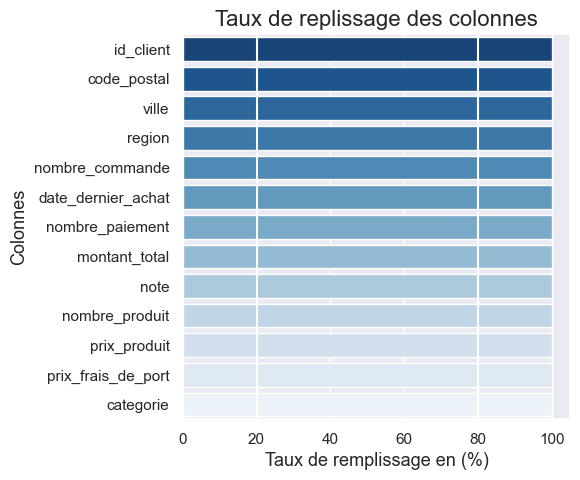

,id_client,code_postal,ville,region,nombre_commande,date_dernier_achat,nombre_paiement,montant_total,note,nombre_produit,prix_produit,prix_frais_de_port,categorie
Valeurs manquantes,0,0,0,0,0,0,0,0,0,0,0,0,0
Nombre de valeurs,94989,94989,94989,94989,94989,94989,94989,94989,94989,94989,94989,94989,94989
Taux de remplissage,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Valeurs différentes,94989,14952,4108,27,9,94730,40,28616,5,20,8555,8620,74


In [102]:
visu(df_final)

#### Création de variable

- Création d'une variable 'récence' en fonction de la variable date_dernier_achat 
    (on suppose que l'étude est faite le 01/10/2018)

In [103]:
#Conversion des colonnes

df_final['date_dernier_achat'] = df_final['date_dernier_achat'].astype('datetime64[ns]')
df_final[['nombre_paiement', 'montant_total', 'prix_produit', 'prix_frais_de_port']] = \
df_final[['nombre_paiement', 'montant_total', 'prix_produit', 'prix_frais_de_port']].astype('float')
df_final[['code_postal','nombre_paiement','note', 'nombre_produit']]= \
df_final[['code_postal','nombre_paiement','note', 'nombre_produit']].astype('int')

In [104]:
df_final.dtypes

id_client                     object
code_postal                    int32
ville                         object
region                        object
nombre_commande               object
date_dernier_achat    datetime64[ns]
nombre_paiement                int32
montant_total                float64
note                           int32
nombre_produit                 int32
prix_produit                 float64
prix_frais_de_port           float64
categorie                     object
dtype: object

In [105]:
# Création de variable récence
for r, l in df_final.iterrows():
    y= datetime.datetime.strptime('2018-10-01 00:00:00', '%Y-%m-%d %H:%M:%S')
    z = y- df_final.loc[r, 'date_dernier_achat']
    day = z.days
    df_final.loc[r,'recence'] = day

In [106]:
df_final.head()

,id_client,code_postal,ville,region,nombre_commande,date_dernier_achat,nombre_paiement,montant_total,note,nombre_produit,prix_produit,prix_frais_de_port,categorie,recence
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,2017-05-16 15:05:35,2,146.87,4,1,124.99,21.88,office_furniture,502.0
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,2018-01-12 20:48:24,8,335.48,5,1,289.00,46.48,housewares,261.0
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,2018-05-19 16:07:45,7,157.73,5,1,139.94,17.79,office_furniture,134.0
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,2018-03-13 16:06:38,1,173.30,5,1,149.94,23.36,office_furniture,201.0
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,2018-07-29 09:51:30,8,252.25,5,1,230.00,22.25,home_confort,63.0


In [107]:
df_final['recence'] = df_final['recence'].astype('int')

In [108]:
df_final.dtypes

id_client                     object
code_postal                    int32
ville                         object
region                        object
nombre_commande               object
date_dernier_achat    datetime64[ns]
nombre_paiement                int32
montant_total                float64
note                           int32
nombre_produit                 int32
prix_produit                 float64
prix_frais_de_port           float64
categorie                     object
recence                        int32
dtype: object

#### Attribution des grands groupes

In [109]:
for r, l in df_final.iterrows():
    if l['categorie'] in mode:
        df_final.loc[r, 'groupe'] = 'mode'
    elif l['categorie'] in home:
        df_final.loc[r, 'groupe'] = 'home'
    elif l['categorie'] in garden:
        df_final.loc[r, 'groupe'] = 'garden'
    elif l['categorie'] in construction:
        df_final.loc[r, 'groupe'] = 'construction'
    elif l['categorie'] in art_and_music:
        df_final.loc[r, 'groupe'] = 'art_and_music'
    elif l['categorie'] in beauty:
        df_final.loc[r, 'groupe'] = 'beauty'
    elif l['categorie'] in food:
        df_final.loc[r, 'groupe'] = 'food'
    elif l['categorie'] in books_and_stationery:
        df_final.loc[r, 'groupe'] = 'books_and_stationery'
    elif l['categorie'] in pc_and_electronics:
        df_final.loc[r, 'groupe'] = 'pc_and_electronics'
    elif l['categorie'] in telephony:
        df_final.loc[r, 'groupe'] = 'telephony'
    elif l['categorie'] in decor_and_other:
        df_final.loc[r, 'groupe'] = 'decor_and_other'
    elif l['categorie'] in baby_and_children:
        df_final.loc[r, 'groupe'] = 'baby_and_children'
    elif l['categorie'] in auto:
        df_final.loc[r, 'groupe'] = 'auto'
    elif l['categorie'] in commerce:
        df_final.loc[r, 'groupe'] = 'commerce'
    else:
        df_final.loc[r, 'groupe'] = 'other'

In [110]:
df_final.to_csv("./Data/Data_Olist.csv")